In [1]:
import seaborn as sns
import pandahouse as ph
import matplotlib.pyplot as plt

In [2]:
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [3]:
query = """
SELECT
id,
toFloat64OrNull(replaceRegexpAll(price, '[$,]', '')) AS price,
room_type,
toFloat64OrNull(review_scores_rating) AS review_scores_rating
FROM ldn_listings
WHERE review_scores_rating IS NOT NULL
LIMIT 1000
"""
df = ph.read_clickhouse(query, connection=connection_default)

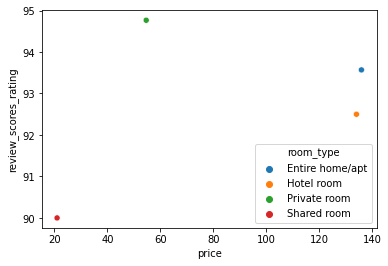

In [4]:
new_df = df.groupby('room_type', as_index=False).agg({'price' : 'mean', 'review_scores_rating' : 'mean'})
sns.scatterplot(data=new_df, x="price", y="review_scores_rating", hue="room_type")

In [5]:
new_df

,room_type,price,review_scores_rating
0,Entire home/apt,135.882957,93.568789
1,Hotel room,134.000000,92.500000
2,Private room,54.642436,94.766208
3,Shared room,21.000000,90.000000


In [6]:
query = """
SELECT 
DISTINCT host_id, 
host_verifications
FROM ldn_listings
WHERE experiences_offered != 'none'
"""
df1 = ph.read_clickhouse(query, connection=connection_default)

In [7]:
df1['host_verifications'] = df1.host_verifications.apply(lambda x: x.strip('[]').replace("'","").split(','))
df1['host_verifications'].explode().value_counts() 

email                     1345
 phone                    1345
 reviews                  1309
 government_id            1196
 jumio                    1115
 offline_government_id     469
 work_email                279
 facebook                  270
 selfie                    252
 identity_manual           227
 manual_offline             70
 google                     34
 kba                        27
phone                       16
 manual_online              16
 sent_id                     6
Name: host_verifications, dtype: int64

In [8]:
query = """
SELECT 
room_type,
toFloat64OrNull(replaceRegexpAll(price, '[$,]', '')) AS price
FROM ldn_listings
WHERE experiences_offered != 'none'
"""
w7 = ph.read_clickhouse(query, connection=connection_default)

In [9]:
w7

,room_type,price
0,Private room,65.0
1,Entire home/apt,100.0
2,Private room,150.0
3,Private room,45.0
4,Private room,25.0
...,...,...
1543,Entire home/apt,100.0
1544,Entire home/apt,125.0
1545,Entire home/apt,185.0
1546,Entire home/apt,110.0


No handles with labels found to put in legend.


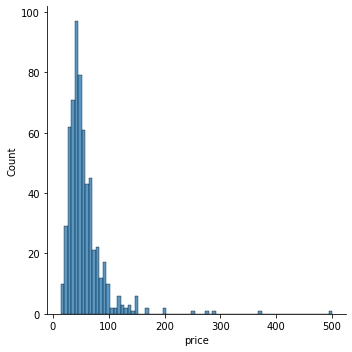

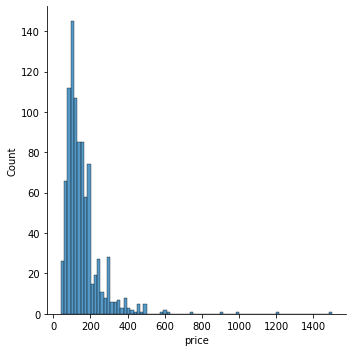

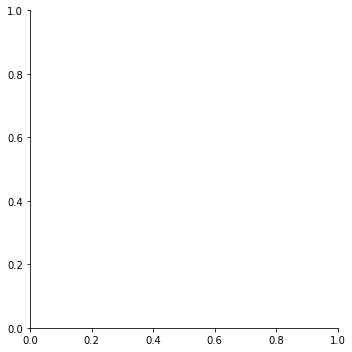

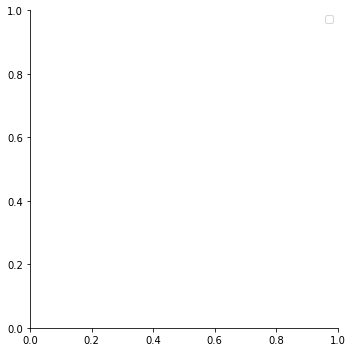

In [10]:
sns.displot(w7.query("room_type=='Private room'").price, kde=False, label='Private')
sns.displot(w7.query("room_type=='Entire home/apt'").price, kde=False, label='Entire')
sns.displot(w7.query("room_type=='hotel room'").price, kde=False, label='hotel')
sns.displot(w7.query("room_type=='shared room'").price, kde=False, label='shared')
plt.legend()
plt.show()

No handles with labels found to put in legend.


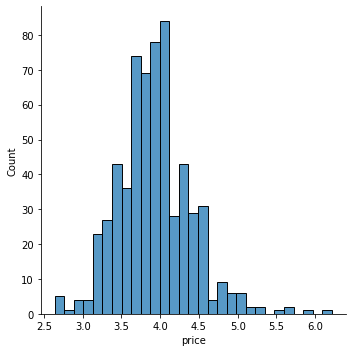

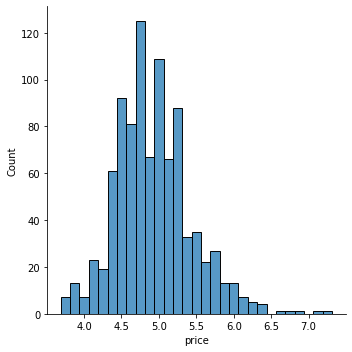

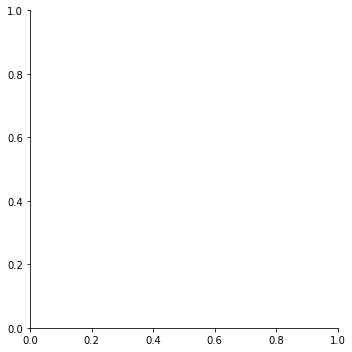

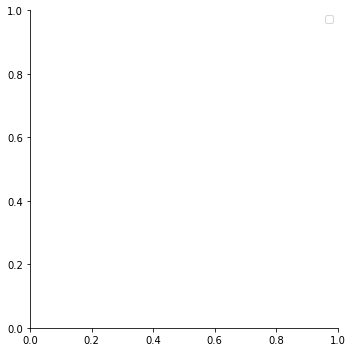

In [11]:
import numpy as np
sns.displot(np.log(w7.query("room_type=='Private room'").price), kde=False, label='Private')
sns.displot(np.log(w7.query("room_type=='Entire home/apt'").price), kde=False, label='Entire')
sns.displot(np.log(w7.query("room_type=='hotel room'").price), kde=False, label='hotel')
sns.displot(np.log(w7.query("room_type=='shared room'").price), kde=False, label='shared')
plt.legend()
plt.show()

In [12]:
query = """
SELECT 
room_type,
toFloat64OrNull(replaceRegexpAll(price, '[$,]', '')) AS price,
first_review
FROM ldn_listings
where first_review > '2010-01-01'
LIMIT 1000
"""
w8 = ph.read_clickhouse(query, connection=connection_default)

In [13]:
w8

,room_type,price,first_review
0,Private room,65.0,2010-08-18
1,Entire home/apt,300.0,2011-03-21
2,Entire home/apt,65.0,2016-03-05
3,Private room,29.0,2010-04-14
4,Private room,100.0,2010-10-16
...,...,...,...
995,Private room,45.0,2012-11-07
996,Private room,51.0,2013-03-18
997,Entire home/apt,79.0,2012-09-17
998,Entire home/apt,110.0,2012-09-24


In [14]:
w8['first_review'] = w8.first_review.apply(lambda x: x[:-6])

In [15]:
w8.groupby('room_type')

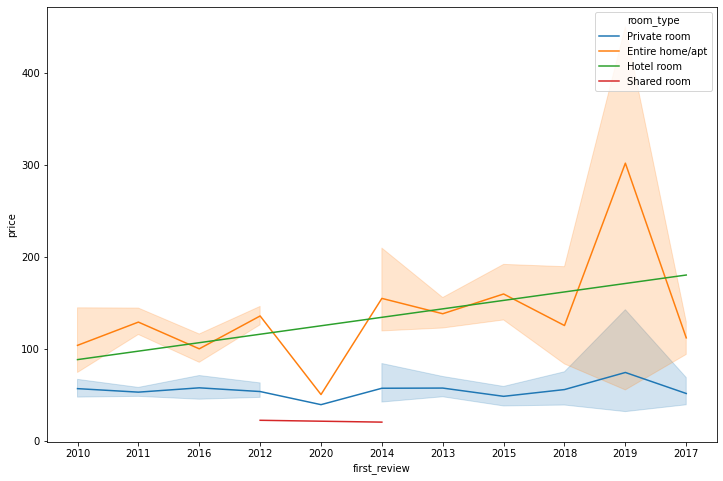

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.lineplot(x='first_review',y='price',hue='room_type',data=w8)